Download the data from Jeff Sackman's Github

In [1]:
import pandas as pd

# Load the ATP match data from Jeff Sackmann’s GitHub from 2015 to 2024
years = range(2015, 2024)
dfs = []

for year in years:
    url = f"https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_{year}.csv"
    try:
        df_year = pd.read_csv(url)
        df_year['year'] = year
        dfs.append(df_year)
    except Exception as e:
        print(f"Failed to load {year}: {e}")

# Combine into one DataFrame
df_all = pd.concat(dfs, ignore_index=True)
df_all = df_all[~df_all['tourney_name'].str.contains('Davis Cup', case=False, na=False)]
df_all['tourney_name'] = df_all['tourney_name'].str.strip().str.lower()




df_all.head(10)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
0,2015-339,brisbane,Hard,28,A,20150104,1,105357,NaN,WC,...,20.0,5.0,8.0,1.0,5.0,153.0,328.0,220.0,221.0,2015
1,2015-339,brisbane,Hard,28,A,20150104,2,103813,NaN,NaN,...,26.0,19.0,13.0,3.0,8.0,73.0,689.0,123.0,440.0,2015
2,2015-339,brisbane,Hard,28,A,20150104,3,105902,NaN,WC,...,22.0,5.0,8.0,10.0,15.0,125.0,430.0,21.0,1730.0,2015
3,2015-339,brisbane,Hard,28,A,20150104,4,104871,NaN,NaN,...,30.0,8.0,10.0,1.0,3.0,31.0,1195.0,72.0,691.0,2015
4,2015-339,brisbane,Hard,28,A,20150104,5,105373,NaN,NaN,...,40.0,19.0,15.0,4.0,8.0,34.0,1094.0,110.0,505.0,2015
5,2015-339,brisbane,Hard,28,A,20150104,6,105238,7.0,NaN,...,32.0,8.0,8.0,11.0,15.0,23.0,1455.0,71.0,700.0,2015
6,2015-339,brisbane,Hard,28,A,20150104,7,103997,NaN,Q,...,30.0,17.0,11.0,4.0,7.0,177.0,282.0,16.0,2080.0,2015
7,2015-339,brisbane,Hard,28,A,20150104,8,105032,NaN,NaN,...,13.0,14.0,8.0,1.0,4.0,85.0,586.0,84.0,595.0,2015
8,2015-339,brisbane,Hard,28,A,20150104,9,105062,NaN,NaN,...,46.0,15.0,15.0,3.0,6.0,69.0,705.0,201.0,242.0,2015
9,2015-339,brisbane,Hard,28,A,20150104,10,106423,NaN,WC,...,23.0,7.0,9.0,1.0,4.0,149.0,341.0,25.0,1365.0,2015


In [20]:
#create a datframe of just the grand slams for the years. 2015-2023

df_slams = df_all[
    (df_all['tourney_name'].isin([
        'australian open', 'roland garros', 'wimbledon', 'us open'
    ])) &
    (df_all['year'].between(2015, 2024))
]

here we created some new features for serve efficiency, rank_diff, fatigue and sets played as well as a match dominance score. We also counted total games played and total games won have a games won ratio.

In [21]:
#created a serve efficiency feature that we addded to the data frame
df_slams['serve_efficiency'] = (
    df_slams['w_1stWon'] / (df_slams['w_1stIn'] + 1) +
    df_slams['w_2ndWon'] / (df_slams['w_svpt'] - df_slams['w_1stIn'] + 1)
)

df_slams['rank_diff'] = df_slams['loser_rank'] - df_slams['winner_rank']
# Count how many sets are recorded by splitting score string on space
df_slams['sets_played'] = df_slams['score'].apply(
    lambda s: len(str(s).split()) if pd.notnull(s) else None
)
df_slams['fatigue']= df_slams['sets_played']*df_slams['minutes']

/tmp/ipython-input-21-4243309158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slams['serve_efficiency'] = (
/tmp/ipython-input-21-4243309158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slams['rank_diff'] = df_slams['loser_rank'] - df_slams['winner_rank']
/tmp/ipython-input-21-4243309158.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [22]:


def parse_score_to_games(score_str):

    (winner_games, loser_games)

    winner_games = 0
    loser_games = 0

    if pd.isnull(score_str):
        return pd.NA, pd.NA

    sets = score_str.strip().split()
    for s in sets:
        # Clean set score (e.g., '7-6(5)' → '7-6')
        s = s.split('(')[0]
        try:
            w, l = map(int, s.split('-'))
            winner_games += w
            loser_games += l
        except:
            return pd.NA, pd.NA

    return winner_games, loser_games

# Add to the score column
parsed_scores = df_slams['score'].apply(parse_score_to_games)

# put winner and loser games into new columns
df_slams['winner_games'] = parsed_scores.apply(lambda x: x[0])
df_slams['loser_games'] = parsed_scores.apply(lambda x: x[1])

# Total games played and games won
df_slams['total_games_played'] = df_slams['winner_games'] + df_slams['loser_games']
df_slams['total_games_won'] = df_slams['winner_games']

# Games won ratio = winner_games / total_games_played
df_slams['games_won_ratio'] = df_slams['total_games_won'] / df_slams['total_games_played']
df_slams['bp_save_ratio'] = df_slams['w_bpSaved'] / (df_slams['w_bpFaced'] + 1)


df_slams['match_dominance_score'] = (
    0.4 * df_slams['games_won_ratio'].fillna(0) +
    0.3 * df_slams['serve_efficiency'].fillna(0) +
    0.2 * df_slams['bp_save_ratio'].fillna(0) +
    0.1 * (df_slams['w_ace'] - df_slams['w_df']).fillna(0) / (df_slams['w_svpt'] + 1)
)

df_slams.head(10)


/tmp/ipython-input-22-1646953709.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slams['winner_games'] = parsed_scores.apply(lambda x: x[0])
/tmp/ipython-input-22-1646953709.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slams['loser_games'] = parsed_scores.apply(lambda x: x[1])
/tmp/ipython-input-22-1646953709.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,rank_diff,sets_played,fatigue,winner_games,loser_games,total_games_played,total_games_won,games_won_ratio,bp_save_ratio,match_dominance_score
139,2015-580,australian open,Hard,128,G,20150119,1,104925,1.0,NaN,...,115.0,3,327.0,18,9,27,18,0.666667,0.750000,0.854116
140,2015-580,australian open,Hard,128,G,20150119,2,105723,NaN,NaN,...,-27.0,4,608.0,22,16,38,22,0.578947,0.666667,0.758735
141,2015-580,australian open,Hard,128,G,20150119,3,104424,NaN,NaN,...,120.0,5,1035.0,23,22,45,23,0.511111,0.600000,0.678581
142,2015-580,australian open,Hard,128,G,20150119,4,104269,31.0,NaN,...,70.0,4,648.0,21,15,36,21,0.583333,0.600000,0.693832
143,2015-580,australian open,Hard,128,G,20150119,5,104545,19.0,NaN,...,97.0,3,381.0,19,14,33,19,0.575758,0.500000,0.812192
144,2015-580,australian open,Hard,128,G,20150119,6,104890,NaN,NaN,...,180.0,4,644.0,23,18,41,23,0.560976,0.555556,0.732759
145,2015-580,australian open,Hard,128,G,20150119,7,104180,NaN,NaN,...,10.0,3,429.0,20,16,36,20,0.555556,0.900000,0.830183
146,2015-580,australian open,Hard,128,G,20150119,8,105138,13.0,NaN,...,24.0,4,716.0,23,17,40,23,0.575,0.869565,0.759271
147,2015-580,australian open,Hard,128,G,20150119,9,103852,12.0,NaN,...,109.0,5,970.0,29,24,53,29,0.54717,0.444444,0.711241
148,2015-580,australian open,Hard,128,G,20150119,10,105173,NaN,NaN,...,44.0,3,414.0,19,11,30,19,0.633333,0.800000,0.800404


Create data frames for all of the slams for future investigation

In [24]:
df_wim = df_slams[
    (df_slams['tourney_name'].str.contains('wimbledon', case=False, na=False)) &
    (df_slams['year'].between(2015, 2024))
]
df_wim.head(10)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,rank_diff,sets_played,fatigue,winner_games,loser_games,total_games_played,total_games_won,games_won_ratio,bp_save_ratio,match_dominance_score
1649,2015-540,wimbledon,Grass,128,G,20150629,1,104925,1.0,NaN,...,32.0,3,NaN,18,12,30,18,0.6,0.700000,0.778022
1650,2015-540,wimbledon,Grass,128,G,20150629,2,103813,NaN,NaN,...,26.0,5,NaN,30,24,54,30,0.555556,0.555556,0.671850
1651,2015-540,wimbledon,Grass,128,G,20150629,3,105732,NaN,Q,...,-72.0,5,NaN,26,24,50,26,0.52,0.562500,0.687131
1652,2015-540,wimbledon,Grass,128,G,20150629,4,106071,27.0,NaN,...,86.0,5,NaN,23,20,43,23,0.534884,0.583333,0.702572
1653,2015-540,wimbledon,Grass,128,G,20150629,5,104919,24.0,NaN,...,50.0,3,NaN,20,16,36,20,0.555556,0.500000,0.733606
1654,2015-540,wimbledon,Grass,128,G,20150629,6,104719,NaN,NaN,...,414.0,3,NaN,18,9,27,18,0.666667,0.800000,0.756897
1655,2015-540,wimbledon,Grass,128,G,20150629,7,104947,NaN,NaN,...,-35.0,4,NaN,25,20,45,25,0.555556,0.500000,0.724102
1656,2015-540,wimbledon,Grass,128,G,20150629,8,104731,14.0,NaN,...,82.0,4,NaN,22,16,38,22,0.578947,0.625000,0.776685
1657,2015-540,wimbledon,Grass,128,G,20150629,9,105227,9.0,NaN,...,165.0,3,NaN,19,11,30,19,0.633333,0.500000,0.757939
1658,2015-540,wimbledon,Grass,128,G,20150629,10,105575,NaN,NaN,...,-33.0,3,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,0.500000,0.565072


In [ ]:
df_roland= df_slams[
    (df_slams['tourney_name'].str.contains('roland garros', case=False, na=False)) &
    (df_slams['year'].between(2015, 2024))
]

In [ ]:
df_aus= df_slams[
    (df_slams['tourney_name'].str.contains('australian open', case=False, na=False)) &
    (df_slams['year'].between(2015, 2024))
]

In [ ]:
df_us_open= df_slams[
    (df_slams['tourney_name'].str.contains('us open', case=False, na=False)) &
    (df_slams['year'].between(2015, 2024))
]

create a function to count the number of seeds that were correct in each tournament. This will be used as our measure of accuracy moving foward.

In [3]:
def simple_tournament_seed_accuracy(df, tourney_name, year, seed_column='winner_seed'):
    """
    Compute how many top seeds reached each later round of the tournament.

    Scoring:
    - R32: Top 16 seeds (max 16 pts)
    - R16: Top 8 seeds (max 8 pts)
    - QF: Top 4 seeds (max 4 pts)
    - SF: Top 2 seeds (max 2 pts)
    - F: Top 1 seed (max 1 pt)

    Returns score out of 31.
    """
    round_targets = {
        'R32': list(range(1, 17)),
        'R16': list(range(1, 9)),
        'QF': list(range(1, 5)),
        'SF': list(range(1, 3)),
        'F': [1]
    }
    total_score = 0

    for rnd, valid_seeds in round_targets.items():
        round_matches = df[
            (df['tourney_name'].str.contains(tourney_name, case=False)) &
            (df['year'] == year) &
            (df['round'] == rnd)
        ]
        # Grab just the winner seeds, drop missing ones, convert to int
        seeds = pd.to_numeric(round_matches[seed_column], errors='coerce').dropna().astype(int)
        # Count how many are in the list of valid seeds
        correct = sum(seed in valid_seeds for seed in seeds)
        total_score += correct

    print(f"{tourney_name} {year} seed accuracy: {total_score}/31")
    return total_score


In [4]:
#function works. 19/31 for wimbledon 2015

score = simple_tournament_seed_accuracy(df_all, 'wimbledon', 2015)



wimbledon 2015 seed accuracy: 19/31


In [5]:
score2 = simple_tournament_seed_accuracy(df_all, 'roland garros', 2020)

roland garros 2020 seed accuracy: 17/31


Get all tournament scores is a function that gets all of the accuracy scores out of 31 for the entire data set. This time we passed the grandslams through it.

In [6]:
def get_all_tournament_scores(df):
    results = []
    grouped = df.groupby(['tourney_name', 'year'])

    for (tourney_name, year), _ in grouped:
        try:
            score = simple_tournament_seed_accuracy(df, tourney_name, year)
            results.append({
                'tourney_name': tourney_name,
                'year': year,
                'score': score
            })
        except Exception as e:
            print(f"⚠️ Error for {tourney_name} {year}: {e}")

    return pd.DataFrame(results)

In [16]:
tournament_scores_df = get_all_tournament_scores(df_wim)

wimbledon 2015 seed accuracy: 19/31
wimbledon 2016 seed accuracy: 16/31
wimbledon 2017 seed accuracy: 17/31
wimbledon 2018 seed accuracy: 12/31
wimbledon 2019 seed accuracy: 15/31
wimbledon 2021 seed accuracy: 16/31
wimbledon 2022 seed accuracy: 12/31
wimbledon 2023 seed accuracy: 19/31


To visualize all of the accuracy scores out of 31 we chose a box plot for the tournaments. Grouped by year, and coloured by each tournament. Plots tournament_scores_df so need to run above line to set tournament_scores_df to something.

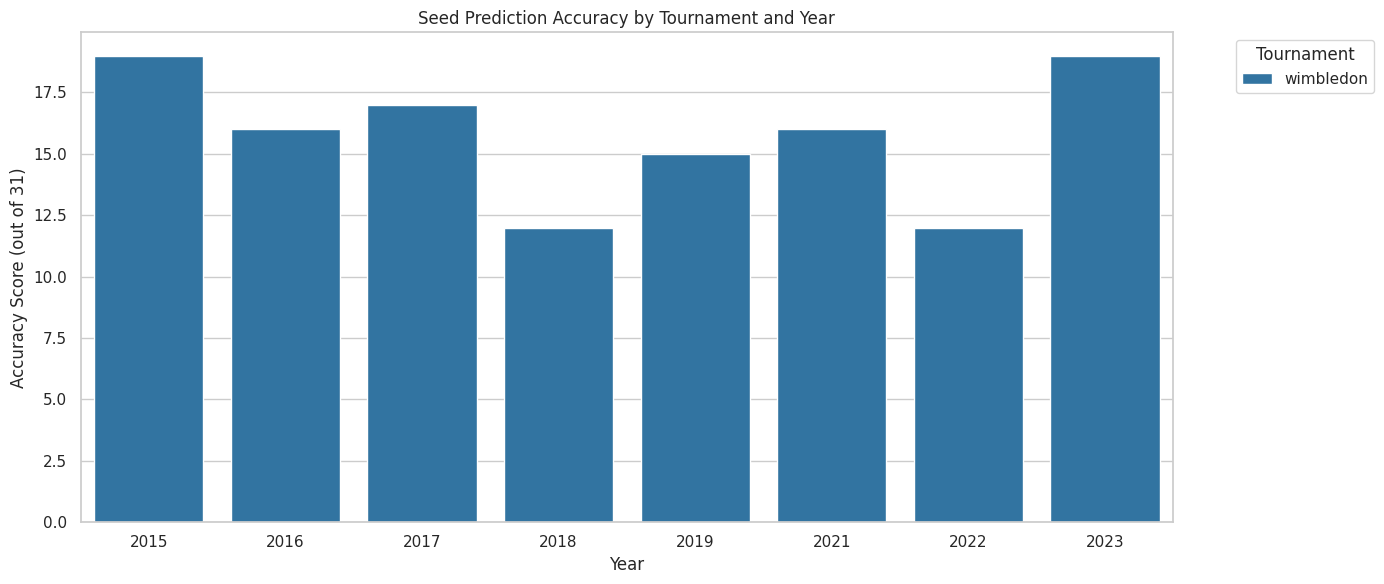

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")

# categorical variable
tournament_scores_df['year'] = tournament_scores_df['year'].astype(str)

# Create grouped bar plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=tournament_scores_df,
    x="year", y="score", hue="tourney_name",
    palette="tab10"
)


plt.title("Seed Prediction Accuracy by Tournament and Year")
plt.ylabel("Accuracy Score (out of 31)")
plt.xlabel("Year")
plt.legend(title="Tournament", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Now that we have a accuracy score for the 4 grandslams from the years 2015 to 2023. We want to re-rank after the first round games to see if that has any effect on the accuracy.

Filtering for rd 128 matches and adding weights to the features to create a simple performance score. Can adjust the weights later using regression etc

In [25]:
def baseline_performance_reseed(df_slams, tourney_name, year):
    """
    Reseed 128 players in a given Slam/year based on R128 match performance.

    Returns:
        all_players_with_seeds (DataFrame): player_name and new_seed (1–128)
    """
    # Filter to R128 matches for this tournament/year
    r128_matches = df_slams[
        (df_slams['tourney_name'].str.lower() == tourney_name.lower()) &
        (df_slams['year'] == year) &
        (df_slams['round'] == 'R128')
    ].copy()

    # Performance score: higher = better performance
    r128_matches['performance_score'] = (
        -r128_matches['sets_played'] +
        -r128_matches['rank_diff'].fillna(0) * 0.05 +
        r128_matches['games_won_ratio'] * 3 +
        -r128_matches['minutes'].fillna(0) * 0.01
    )

    # Winners get their actual performance score
    winners = r128_matches[['winner_name', 'performance_score']].rename(columns={
        'winner_name': 'player_name'
    })

    # Losers get a lower score (they lost)
    losers = r128_matches[['loser_name']].rename(columns={'loser_name': 'player_name'})
    losers['performance_score'] = -1000

    # Combine all 128 players
    all_players = pd.concat([winners, losers], ignore_index=True)

    # Ensure exactly 128 players
    assert all_players['player_name'].nunique() == 128, "Not exactly 128 players found."

    # Sort by performance and assign seeds 1–128
    all_players = all_players.drop_duplicates('player_name')  # Safety
    all_players = all_players.sort_values(by='performance_score', ascending=False).reset_index(drop=True)
    all_players['new_seed'] = range(1, 129)

    return all_players[['player_name', 'new_seed']]


In [26]:
grand_slams = ['Australian Open', 'Roland Garros', 'Wimbledon', 'US Open']
years = range(2015, 2024)

In [27]:
import numpy as np

def ml_inertia_based_reseed(df, tourney_name, year):
    r128 = df[
        (df['tourney_name'].str.lower() == tourney_name.lower()) &
        (df['year'] == year) &
        (df['round'] == 'R128')
    ].copy()

    r128 = r128.dropna(subset=['winner_name', 'loser_name'])

    players = pd.DataFrame({
        'player_name': pd.concat([r128['winner_name'], r128['loser_name']], ignore_index=True),
        'original_seed': pd.concat([r128['winner_seed'], r128['loser_seed']], ignore_index=True),
        'rank': pd.concat([r128['winner_rank'], r128['loser_rank']], ignore_index=True)
    })

    players['original_seed'] = pd.to_numeric(players['original_seed'], errors='coerce')
    players['rank'] = pd.to_numeric(players['rank'], errors='coerce')
    players = players.drop_duplicates('player_name').dropna(subset=['player_name'])

    if len(players) != 128:
        print(f" Tournament {tourney_name} {year} has {len(players)} players, expected 128. Skipping...")
        return None

    seeded = players[players['original_seed'].notna()]
    unseeded = players[players['original_seed'].isna()].sort_values(by='rank')
    start_seed = int(seeded['original_seed'].max()) + 1 if not seeded.empty else 1
    unseeded = unseeded.copy()
    unseeded['original_seed'] = range(start_seed, start_seed + len(unseeded))
    all_players = pd.concat([seeded, unseeded], ignore_index=True)

    # Safeguard against missing columns
    required = ['sets_played', 'rank_diff', 'games_won_ratio', 'minutes']
    missing = [col for col in required if col not in r128.columns]
    if missing:
        print(f" Missing columns in {tourney_name} {year}: {missing}")
        return None

   #performance score


    X_features = r128[final_features].copy()
    r128['performance_score'] = model_final.predict(X_features)


    perf = r128[['winner_name', 'performance_score']].rename(columns={'winner_name': 'player_name'})

    # Merge performance scores
    all_players = all_players.merge(perf, on='player_name', how='left')
    all_players['performance_score'] = all_players['performance_score'].fillna(-5).astype(float)

    all_players['inertia'] = np.log1p(all_players['original_seed'])
    all_players['adjustment'] = (all_players['performance_score'] / all_players['inertia']).clip(-5, 5).round().astype(int)
    all_players['new_seed'] = (all_players['original_seed'] - all_players['adjustment']).clip(1, 128)

    all_players = all_players.sort_values(by='new_seed').drop_duplicates('player_name').reset_index(drop=True)
    all_players['new_seed'] = range(1, 129)

    print(f" Reseeded {tourney_name} {year}")
    return all_players[['player_name', 'new_seed']]







In [13]:
for tourney in grand_slams:
    for year in years:
        try:
            df_tourney = df_slams[
                (df_slams['tourney_name'].str.lower() == tourney.lower()) &
                (df_slams['year'] == year)
            ].copy()

            if df_tourney.empty:
                continue

            official_score = simple_tournament_seed_accuracy(df_slams, tourney, year, seed_column='winner_seed')
            reseeded = ml_inertia_based_reseed(df_slams, tourney, year)

            if reseeded is None:
                continue

            df_tourney = df_tourney.merge(
                reseeded, left_on='winner_name', right_on='player_name', how='left'
            ).rename(columns={'new_seed': 'winner_seed_reseeded'}).drop(columns='player_name')

            reseed_score = simple_tournament_seed_accuracy(df_tourney, tourney, year, seed_column='winner_seed_reseeded')

            results.append({
                'tournament': tourney,
                'year': year,
                'official_score': official_score,
                'reseeded_score': reseed_score
            })

        except Exception as e:
            print(f"⚠️ Error with {tourney} {year}: {e}")

accuracy_df = pd.DataFrame(results)

Australian Open 2015 seed accuracy: 22/31
⚠️ Error with Australian Open 2015: name 'final_features' is not defined
Australian Open 2016 seed accuracy: 25/31
⚠️ Error with Australian Open 2016: name 'final_features' is not defined
Australian Open 2017 seed accuracy: 14/31
⚠️ Error with Australian Open 2017: name 'final_features' is not defined
Australian Open 2018 seed accuracy: 13/31
⚠️ Error with Australian Open 2018: name 'final_features' is not defined
Australian Open 2019 seed accuracy: 18/31
⚠️ Error with Australian Open 2019: name 'final_features' is not defined
Australian Open 2020 seed accuracy: 18/31
⚠️ Error with Australian Open 2020: name 'final_features' is not defined
Australian Open 2021 seed accuracy: 20/31
⚠️ Error with Australian Open 2021: name 'final_features' is not defined
Australian Open 2022 seed accuracy: 15/31
⚠️ Error with Australian Open 2022: name 'final_features' is not defined
Australian Open 2023 seed accuracy: 12/31
⚠️ Error with Australian Open 2023: na

NameError: name 'results' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape accuracy_df to long format for better styling
plot_df = accuracy_df.melt(
    id_vars=['year', 'tournament'],
    value_vars=['official_score', 'reseeded_score'],
    var_name='score_type',
    value_name='accuracy'
)

# Define line styles for official vs reseeded
line_styles = {
    'official_score': '',
    'reseeded_score': (4, 2)  # dashed
}

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=plot_df,
    x='year',
    y='accuracy',
    hue='tournament',
    style='score_type',
    dashes=line_styles,
    markers=True,
    markersize=8
)

plt.title("Official vs Re-seeded Accuracy Scores (2015–2023)")
plt.ylabel("Accuracy Score (out of 31)")
plt.xlabel("Year")
plt.legend(title="Tournament & Score Type")
plt.tight_layout()
plt.show()




# New Section

Run these prior to the code above to get final_features and performance score

r128 is the data set from df_slams that is just the first round. Filtered even futher here to become df_r128 which just has the winner name, sets played, rank_diff etc. To prep df_128 for linear regression. Also important to note here we set our round_reached as the target variable here.

In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Define the round order
round_order = ['R128', 'R64', 'R32', 'R16', 'QF', 'SF', 'F', 'W']
round_encoding = {rnd: i for i, rnd in enumerate(round_order)}

# Step 1: Filter R128 matches
r128 = df_slams[df_slams['round'] == 'R128'].copy()

# Step 2: Estimate sets_played from score string
def count_sets(score_str):
    try:
        return len(score_str.strip().split())
    except:
        return np.nan

r128['sets_played'] = r128['score'].apply(count_sets)

# Step 3: Compute rank difference and game dominance
r128['rank_diff'] = r128['loser_rank'] - r128['winner_rank']
r128['games_won_ratio'] = r128['winner_games'] / r128['total_games_played']

# Step 4: Encode tournament outcome (how far winner advanced)
max_rounds = df_slams.groupby('winner_name')['round'].agg(lambda rounds: max(rounds, key=round_order.index))
max_rounds = max_rounds.map(round_encoding)

# Step 5: Assemble modeling dataset
df_r128 = r128[['winner_name', 'sets_played', 'rank_diff', 'games_won_ratio', 'minutes']].copy()
df_r128 = df_r128.rename(columns={'winner_name': 'player_name'})
df_r128 = df_r128.merge(max_rounds.rename('round_reached'), left_on='player_name', right_index=True)
df_r128 = df_r128.dropna()


linear regression performed on the 4 variables we personally deemed important. The weights were set and we have passed that through the function and got the scores of all of the tournaments. It did a little better in some instances and a little worse in some instances. Nothing worth publishing here. But nice that we made the performance score code and were able to test our methodology etc and then were able to check it.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming df_r128 contains one row per player after R128
X = df_r128[['sets_played', 'rank_diff', 'games_won_ratio', 'minutes']]
y = df_r128['round_reached']  # e.g., integer values: R128=0, R64=1, R32=2, R16=3, QF=4, SF=5, F=6, W=7

model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X, y)

print("Learned weights:", model.named_steps['linearregression'].coef_)


Learned weights: [-0.16720917  0.37039532  0.24039269  0.03429819]


rather than running a liner regression here we did an Xgboost on the same variables. Here the MSE is around 2. Which is significantly worse than the other models we were able to develop as you will see later on. This means roughly that we are around sqrt2 amount of rounds out with our predictions.

In [30]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Force all columns to be numeric
X = df_r128[['sets_played', 'rank_diff', 'games_won_ratio', 'minutes']].copy()
X = X.apply(pd.to_numeric, errors='coerce')  # Coerce invalid values to NaN

# Drop rows with missing data (or fill if you'd prefer)
X = X.dropna()
y = df_r128.loc[X.index, 'round_reached']  # Align target variable with cleaned features


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)


Test MSE: 2.4153060913085938


In [31]:
df_slams.head(20)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,rank_diff,sets_played,fatigue,winner_games,loser_games,total_games_played,total_games_won,games_won_ratio,bp_save_ratio,match_dominance_score
139,2015-580,australian open,Hard,128,G,20150119,1,104925,1.0,NaN,...,115.0,3,327.0,18,9,27,18,0.666667,0.750000,0.854116
140,2015-580,australian open,Hard,128,G,20150119,2,105723,NaN,NaN,...,-27.0,4,608.0,22,16,38,22,0.578947,0.666667,0.758735
141,2015-580,australian open,Hard,128,G,20150119,3,104424,NaN,NaN,...,120.0,5,1035.0,23,22,45,23,0.511111,0.600000,0.678581
142,2015-580,australian open,Hard,128,G,20150119,4,104269,31.0,NaN,...,70.0,4,648.0,21,15,36,21,0.583333,0.600000,0.693832
143,2015-580,australian open,Hard,128,G,20150119,5,104545,19.0,NaN,...,97.0,3,381.0,19,14,33,19,0.575758,0.500000,0.812192
144,2015-580,australian open,Hard,128,G,20150119,6,104890,NaN,NaN,...,180.0,4,644.0,23,18,41,23,0.560976,0.555556,0.732759
145,2015-580,australian open,Hard,128,G,20150119,7,104180,NaN,NaN,...,10.0,3,429.0,20,16,36,20,0.555556,0.900000,0.830183
146,2015-580,australian open,Hard,128,G,20150119,8,105138,13.0,NaN,...,24.0,4,716.0,23,17,40,23,0.575,0.869565,0.759271
147,2015-580,australian open,Hard,128,G,20150119,9,103852,12.0,NaN,...,109.0,5,970.0,29,24,53,29,0.54717,0.444444,0.711241
148,2015-580,australian open,Hard,128,G,20150119,10,105173,NaN,NaN,...,44.0,3,414.0,19,11,30,19,0.633333,0.800000,0.800404


we have all of these columns now in df_slams. Created serve efficiency, match dominance, sets_played and many more.

here were filtering df_slams to only contain the round of 128 matches in preperation model. r128_full is the data we are using for our X and we are going to test to see which features we will need moving foward.

In [32]:
# Filter the df_slams dataset to only include R128 matches
r128_full = df_slams[df_slams['round'] == 'R128'].copy()

# Show the shape and head of the filtered dataset
r128_full.shape, r128_full.head()


((2240, 61),
     tourney_id     tourney_name surface  draw_size tourney_level  \
 139   2015-580  australian open    Hard        128             G   
 140   2015-580  australian open    Hard        128             G   
 141   2015-580  australian open    Hard        128             G   
 142   2015-580  australian open    Hard        128             G   
 143   2015-580  australian open    Hard        128             G   
 
      tourney_date  match_num  winner_id  winner_seed winner_entry  ...  \
 139      20150119          1     104925          1.0          NaN  ...   
 140      20150119          2     105723          NaN          NaN  ...   
 141      20150119          3     104424          NaN          NaN  ...   
 142      20150119          4     104269         31.0          NaN  ...   
 143      20150119          5     104545         19.0          NaN  ...   
 
     rank_diff sets_played  fatigue winner_games  loser_games  \
 139     115.0           3    327.0           18      

we have assigned a new column to the r128_full that includes the furthest rounf reached to for each player in each tournament.

In [33]:
# First, get all unique rounds in order of progression
round_order = ['R128', 'R64', 'R32', 'R16', 'QF', 'SF', 'F', 'W']
round_to_score = {rnd: i for i, rnd in enumerate(round_order)}

# Group by player and tournament to get the furthest round reached
rounds_df = df_slams[df_slams['winner_name'].notna()][['tourney_name', 'year', 'winner_name', 'round']].copy()
rounds_df['round_score'] = rounds_df['round'].map(round_to_score)
furthest_round = (
    rounds_df.groupby(['tourney_name', 'year', 'winner_name'])['round_score']
    .max()
    .reset_index()
    .rename(columns={'winner_name': 'player_name', 'round_score': 'round_reached'})
)

# Merge with your r128_full to assign round_reached to each player
r128_full = r128_full.merge(
    furthest_round,
    how='left',
    left_on=['tourney_name', 'year', 'winner_name'],
    right_on=['tourney_name', 'year', 'player_name']
).drop(columns='player_name')


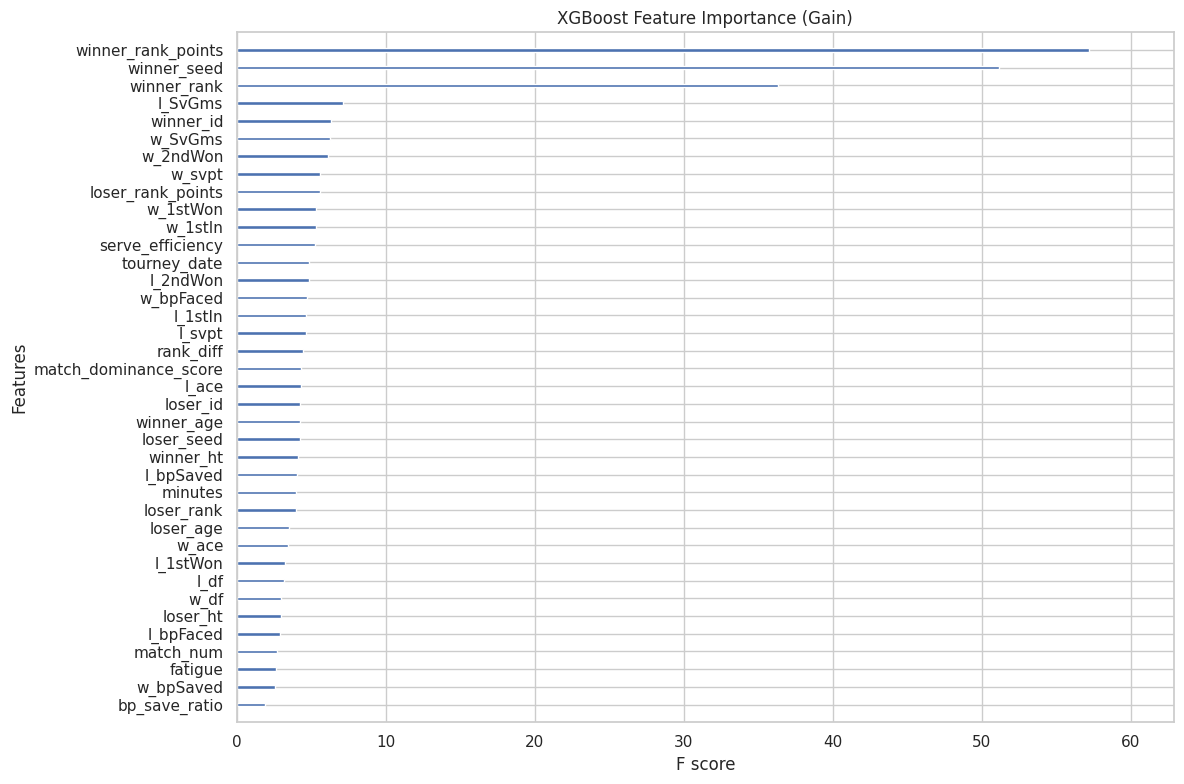

Test MSE: 1.0883735418319702


In [34]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Step 2: Define target
# Ensure 'round_reached' is already present or computed from your full match history
y = r128_full['round_reached']

# Step 3: Select numeric features automatically (excluding target)
exclude_cols = ['round_reached', 'winner_name', 'loser_name', 'score', 'round']
numeric_cols = r128_full.select_dtypes(include=['number']).columns.difference(exclude_cols)
X = r128_full[numeric_cols]

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: XGBoost training
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=4, learning_rate=0.1)
model.fit(X_train, y_train)

# Step 6: Plot feature importance
fig, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(model, importance_type='gain', ax=ax, show_values=False)
plt.title("XGBoost Feature Importance (Gain)")
plt.tight_layout()
plt.show()

# Step 7: Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)


Test MSE without winner_rank_points: 1.0266798734664917


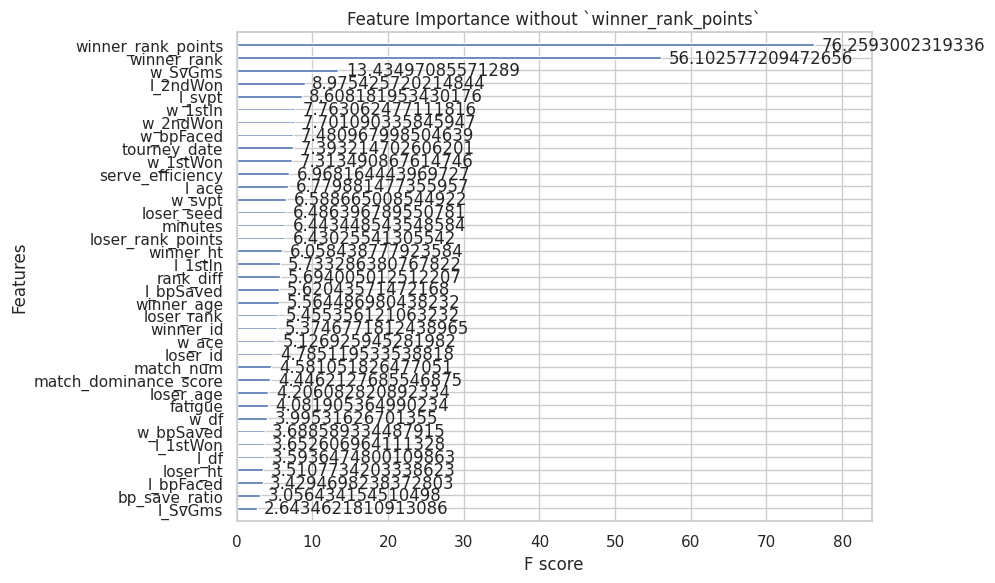

In [35]:
# Remove winner_rank_points from feature set


X_reduced = X.drop(columns=['winner_seed'])

# Re-split and retrain
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

model_reduced = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)
model_reduced.fit(X_train, y_train)

# Plot new feature importances
fig, ax = plt.subplots(figsize=(10, 6))
xgb.plot_importance(model_reduced, importance_type='gain', ax=ax)
plt.title("Feature Importance without `winner_rank_points`")
plt.tight_layout()

# Evaluate new performance
y_pred_reduced = model_reduced.predict(X_test)
reduced_mse = mean_squared_error(y_test, y_pred_reduced)
print("Test MSE without winner_rank_points:", reduced_mse)


this is continuation of testing which features are most important to predict the y. To keep integrity in the model we want to hold out all of the most correlated features as well as making sure we are focusing on just the first round performance features as our method of prediction. we have a ml_performance score which is created you can see that in here and that proves to us that it is a good predictor of performance.

Test MSE 1.0198447704315186


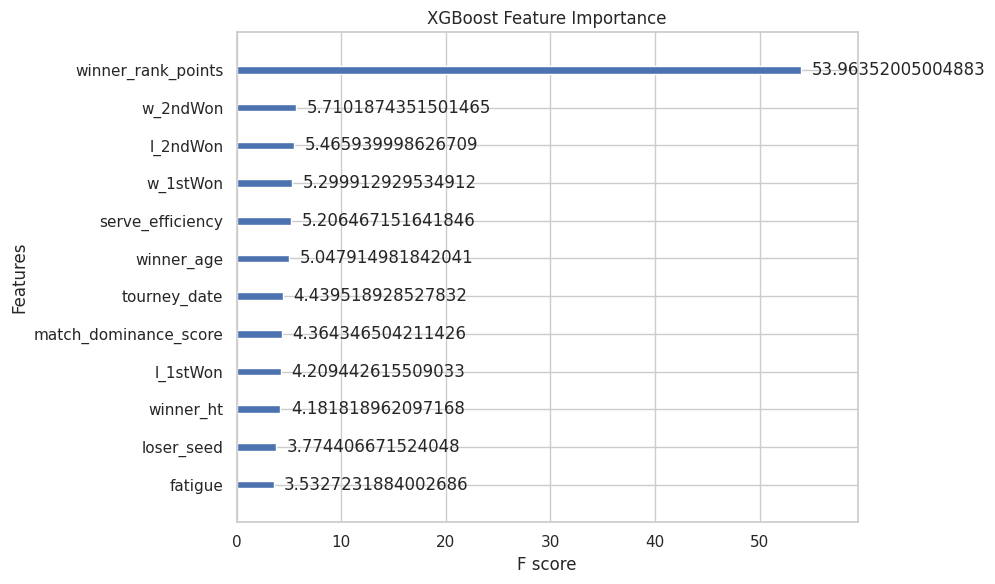

In [36]:
X_final = X.drop(columns=[
    # Rankings (we already dropped these earlier)
     'winner_seed', 'winner_rank',
    'loser_rank', 'loser_rank_points', 'rank_diff',

    # Player IDs (not informative for prediction)
    'winner_id', 'loser_id','match_num',



    # Raw serve stats (covered by serve_efficiency)
    'w_svpt', 'w_1stIn', 'w_df', 'l_df', 'l_svpt', 'l_1stIn', 'l_SvGms',

    # Low-value aces & redundant errors (covered by match_dominance_score or serve_efficiency)
    'w_ace', 'l_ace',

    # Redundant with fatigue or sets_played
    'minutes', 'w_SvGms', 'sets_played',

    # Redundant or defensive stats with low predictive value
    'w_bpFaced', 'l_bpFaced', 'bp_save_ratio', 'w_bpSaved', 'l_bpSaved',

    # Possibly redundant demographics (you can test `winner_age` or `winner_ht` later)
    'loser_ht', 'loser_age'
])


X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

model_final = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)
model_final.fit(X_train, y_train)

# Plot importance
fig, ax = plt.subplots(figsize=(10, 6))
xgb.plot_importance(model_final, importance_type='gain', ax=ax)
plt.title("XGBoost Feature Importance")
plt.tight_layout()

# Evaluate
y_pred_final = model_final.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred_final)
print("Test MSE", final_mse)


this is just to test which features are the most correlated so that we can exclude them from consideration for the model.

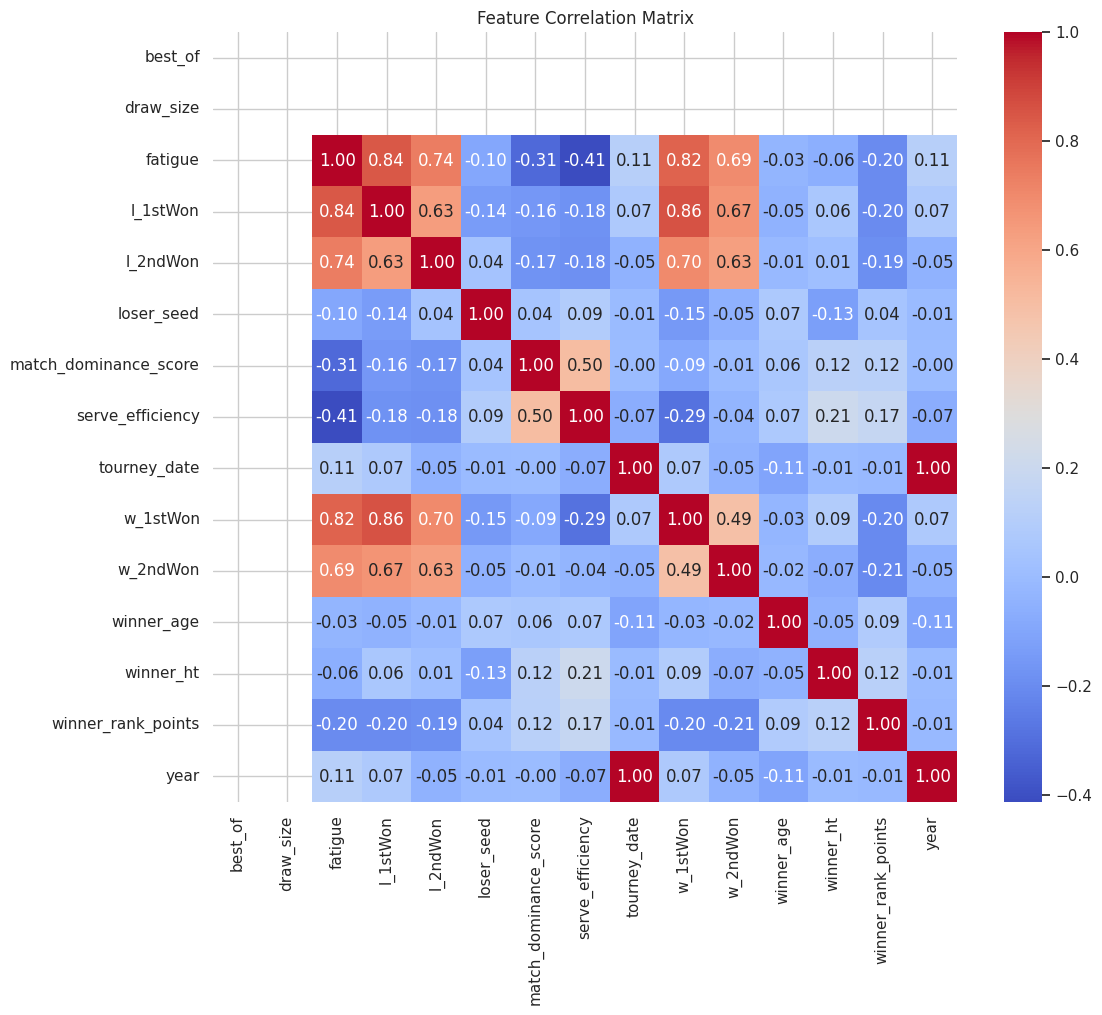

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: filter to the features used in X_final
corr_matrix = X_final.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


these are the features we deemed as the most important for consideration for the ml performance score, based on making the MSE down to 1.6 which means using only these features we are able to predict the round reached and on average only be wrong by about 1 round. This is close the model which includes the use of seed and atp rank.

In [38]:
# Define the final features FIRST
final_features = [

    'w_2ndWon',
    'l_1stWon',
    'w_1stWon',

    'serve_efficiency',
    'fatigue',

    'match_dominance_score',
    'l_2ndWon'
]
df_full = r128_full.copy()

# STEP 2 — Use them to create train/test split
X_final = df_full[final_features]
y = df_full['round_reached']  # or your correct target

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# STEP 3 — Train the model on these columns
model_final = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)
model_final.fit(X_train, y_train)

# STEP 4 — Use same features to create R128 prediction input
X_r128 = r128_full[final_features]
r128_full['ml_performance_score'] = model_final.predict(X_r128)
# ---- Boost performance score based on opponent rank and match dominance ----


import numpy as np

# Ensure ranks are numeric
r128_full['winner_rank'] = pd.to_numeric(r128_full['winner_rank'], errors='coerce')
r128_full['loser_rank'] = pd.to_numeric(r128_full['loser_rank'], errors='coerce')

# Bonus: beating a stronger opponent with high dominance = more credit
r128_full['rank_underdog_bonus'] = np.log1p(r128_full['loser_rank'] - r128_full['winner_rank'])
r128_full['adjusted_bonus'] = r128_full['match_dominance_score'] * r128_full['rank_underdog_bonus']

# Add the bonus to the ML-based score
r128_full['ml_performance_score'] += r128_full['adjusted_bonus']



/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


here are some of the performance scores here. Sorted, notably using only the first round performance we are able to have the best players in the world with the top performance scores based only on the first round. So here we have added a performance score to every first round match. For wimbledon it is interesting that we are able to improve the accuracy score every single year. I held out winner height and winner age because i wanted it to soley be based on the first round performance.

In [39]:
print(r128_full[['winner_name', 'ml_performance_score']].sort_values(by='ml_performance_score', ascending=False).head(10))


                winner_name  ml_performance_score
667   Roberto Bautista Agut              7.892539
1017           John Millman              7.631886
2112         Carlos Alcaraz              7.538292
748          Kevin Anderson              7.531242
1536         Novak Djokovic              7.524625
2142            Andy Murray              7.423426
1051            Borna Coric              7.351352
220           Jeremy Chardy              7.326586
1151           Rafael Nadal              7.231048
100   Roberto Bautista Agut              7.075221


In [45]:
import numpy as np

def ml_inertia_based_reseed(df, tourney_name, year):
    r128 = df[
        (df['tourney_name'].str.lower() == tourney_name.lower()) &
        (df['year'] == year) &
        (df['round'] == 'R128')
    ].copy()

    r128 = r128.dropna(subset=['winner_name', 'loser_name'])

    players = pd.DataFrame({
        'player_name': pd.concat([r128['winner_name'], r128['loser_name']], ignore_index=True),
        'original_seed': pd.concat([r128['winner_seed'], r128['loser_seed']], ignore_index=True),
        'rank': pd.concat([r128['winner_rank'], r128['loser_rank']], ignore_index=True)
    })

    players['original_seed'] = pd.to_numeric(players['original_seed'], errors='coerce')
    players['rank'] = pd.to_numeric(players['rank'], errors='coerce')
    players = players.drop_duplicates('player_name').dropna(subset=['player_name'])

    if len(players) != 128:
        print(f" Tournament {tourney_name} {year} has {len(players)} players, expected 128. Skipping...")
        return None

    seeded = players[players['original_seed'].notna()]
    unseeded = players[players['original_seed'].isna()].sort_values(by='rank')
    start_seed = int(seeded['original_seed'].max()) + 1 if not seeded.empty else 1
    unseeded = unseeded.copy()
    unseeded['original_seed'] = range(start_seed, start_seed + len(unseeded))
    all_players = pd.concat([seeded, unseeded], ignore_index=True)

    # account missing columns
    required = ['sets_played', 'rank_diff', 'games_won_ratio', 'minutes']
    missing = [col for col in required if col not in r128.columns]
    if missing:
        print(f" Missing columns in {tourney_name} {year}: {missing}")
        return None


    X_features = r128[final_features].copy()
    r128['performance_score'] = model_final.predict(X_features)


    perf = r128[['winner_name', 'performance_score']].rename(columns={'winner_name': 'player_name'})

    # Merge performance scores
    all_players = all_players.merge(perf, on='player_name', how='left')
    all_players['performance_score'] = all_players['performance_score'].fillna(-5).astype(float)

    all_players['inertia'] = np.log1p(all_players['original_seed'])
    all_players['adjustment'] = (all_players['performance_score'] / all_players['inertia']).clip(-5, 5).round().astype(int)
    all_players['new_seed'] = (all_players['original_seed'] - all_players['adjustment']).clip(1, 128)

    all_players = all_players.sort_values(by='new_seed').drop_duplicates('player_name').reset_index(drop=True)
    all_players['new_seed'] = range(1, 129)

    print(f" Reseeded {tourney_name} {year}")
    return all_players[['player_name', 'new_seed']]



results=[]
for tourney in grand_slams:
    for year in years:
        try:
            df_tourney = df_slams[
                (df_slams['tourney_name'].str.lower() == tourney.lower()) &
                (df_slams['year'] == year)
            ].copy()

            if df_tourney.empty:
                continue

            official_score = simple_tournament_seed_accuracy(df_slams, tourney, year, seed_column='winner_seed')
            reseeded = ml_inertia_based_reseed(df_slams, tourney, year)

            if reseeded is None:
                continue

            df_tourney = df_tourney.merge(
                reseeded, left_on='winner_name', right_on='player_name', how='left'
            ).rename(columns={'new_seed': 'winner_seed_reseeded'}).drop(columns='player_name')

            reseed_score = simple_tournament_seed_accuracy(df_tourney, tourney, year, seed_column='winner_seed_reseeded')

            results.append({
                'tournament': tourney,
                'year': year,
                'official_score': official_score,
                'reseeded_score': reseed_score
            })

        except Exception as e:
            print(f"⚠️ Error with {tourney} {year}: {e}")

accuracy_df = pd.DataFrame(results)

Australian Open 2015 seed accuracy: 22/31
 Reseeded Australian Open 2015
Australian Open 2015 seed accuracy: 22/31
Australian Open 2016 seed accuracy: 25/31
 Reseeded Australian Open 2016
Australian Open 2016 seed accuracy: 25/31
Australian Open 2017 seed accuracy: 14/31
 Reseeded Australian Open 2017
Australian Open 2017 seed accuracy: 15/31
Australian Open 2018 seed accuracy: 13/31
 Reseeded Australian Open 2018
Australian Open 2018 seed accuracy: 14/31
Australian Open 2019 seed accuracy: 18/31
 Reseeded Australian Open 2019
Australian Open 2019 seed accuracy: 18/31
Australian Open 2020 seed accuracy: 18/31
 Reseeded Australian Open 2020
Australian Open 2020 seed accuracy: 18/31
Australian Open 2021 seed accuracy: 20/31
 Reseeded Australian Open 2021
Australian Open 2021 seed accuracy: 20/31
Australian Open 2022 seed accuracy: 15/31
 Reseeded Australian Open 2022
Australian Open 2022 seed accuracy: 17/31
Australian Open 2023 seed accuracy: 12/31
 Reseeded Australian Open 2023
Austral

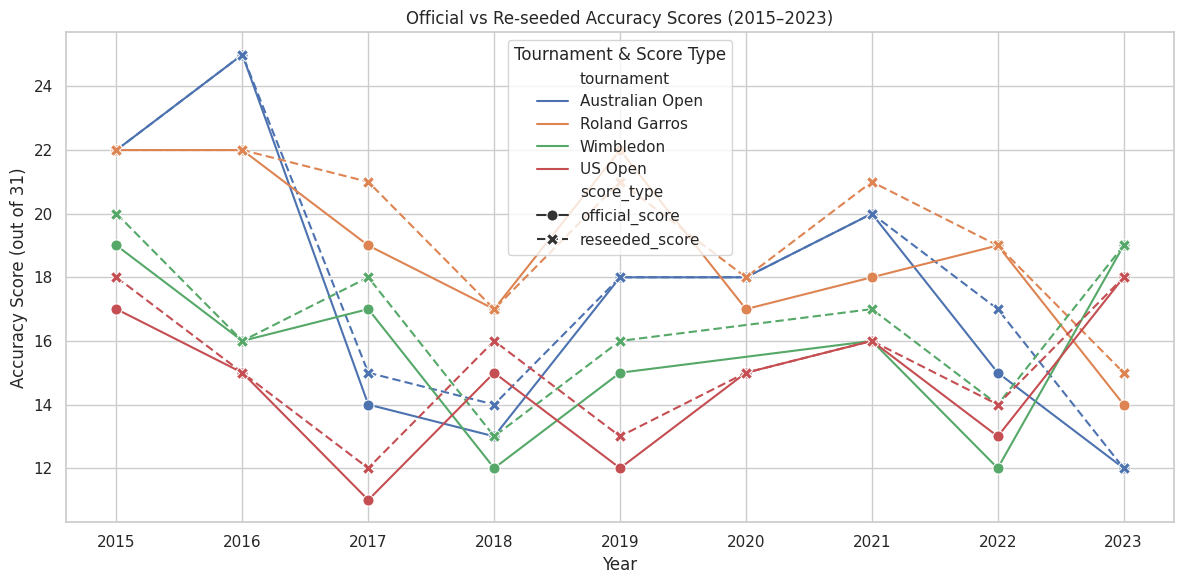

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape accuracy_df to long format for better styling
plot_df = accuracy_df.melt(
    id_vars=['year', 'tournament'],
    value_vars=['official_score', 'reseeded_score'],
    var_name='score_type',
    value_name='accuracy'
)

# Define line styles for official vs reseeded
line_styles = {
    'official_score': '',
    'reseeded_score': (4, 2)  # dashed
}

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=plot_df,
    x='year',
    y='accuracy',
    hue='tournament',
    style='score_type',
    dashes=line_styles,
    markers=True,
    markersize=8
)

plt.title("Official vs Re-seeded Accuracy Scores (2015–2023)")
plt.ylabel("Accuracy Score (out of 31)")
plt.xlabel("Year")
plt.legend(title="Tournament & Score Type")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Step 1 — Get ALL Wimbledon matches (2015–2024)
df_wim_all = df_slams[
    (df_slams['tourney_name'].str.lower() == 'wimbledon') &
    (df_slams['year'].between(2015, 2024))
].copy()

# Step 2 — Map rounds to numeric values
round_mapping = {
    'R128': 1, 'R64': 2, 'R32': 3, 'R16': 4,
    'QF': 5, 'SF': 6, 'F': 7, 'W': 8
}
df_wim_all['round_value'] = df_wim_all['round'].map(round_mapping)

# Step 3 — Compute max round reached per player
player_rounds = pd.concat([
    df_wim_all[['winner_name', 'round_value']].rename(columns={'winner_name': 'player_name'}),
    df_wim_all[['loser_name', 'round_value']].rename(columns={'loser_name': 'player_name'})
])
player_max_round = player_rounds.groupby('player_name')['round_value'].max().reset_index()
player_max_round = player_max_round.rename(columns={'round_value': 'round_reached'})

# Step 4 — Filter R128 matches (to use their features)
df_r128 = df_wim_all[df_wim_all['round'] == 'R128'].copy()

# Step 5 — Ensure all final features are present
missing = [feat for feat in final_features if feat not in df_r128.columns]
if missing:
    raise ValueError(f"Missing final_features in R128 data: {missing}")

# Step 6 — Build player-feature DataFrame from winners & losers
winner_df = df_r128[[*final_features, 'winner_name']].copy()
winner_df = winner_df.rename(columns={'winner_name': 'player_name'})

loser_df = df_r128[[*final_features, 'loser_name']].copy()
loser_df = loser_df.rename(columns={'loser_name': 'player_name'})

df_players = pd.concat([winner_df, loser_df], ignore_index=True)
df_players = df_players.drop_duplicates('player_name')
df_players = df_players.dropna(subset=final_features)

# Step 7 — Merge with correct round reached
df_players = df_players.merge(player_max_round, on='player_name', how='left')
df_players = df_players.dropna(subset=['round_reached'])

# Step 8 — Train model
X = df_players[final_features]
y = df_players['round_reached']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_final = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1
)
model_final.fit(X_train, y_train)

# Step 9 — Predict scores
df_players['ml_performance_score'] = model_final.predict(X)
df_players = df_players.sort_values(by='ml_performance_score', ascending=False).reset_index(drop=True)

# Step 10 — View top 10
print(df_players[['player_name', 'ml_performance_score', 'round_reached']].head(10))


In [ ]:
results = []

for tourney in ['wimbledon']:
    for year in range(2015, 2025):
        try:
            df_tourney = df_slams[
                (df_slams['tourney_name'].str.lower() == tourney.lower()) &
                (df_slams['year'] == year)
            ].copy()

            if df_tourney.empty:
                continue

            official_score = simple_tournament_seed_accuracy(df_slams, tourney, year, seed_column='winner_seed')
            reseeded = ml_inertia_based_reseed(df_slams, tourney, year)  # This uses model_final

            if reseeded is None:
                continue

            df_tourney = df_tourney.merge(
                reseeded, left_on='winner_name', right_on='player_name', how='left'
            ).rename(columns={'new_seed': 'winner_seed_reseeded'}).drop(columns='player_name')

            reseed_score = simple_tournament_seed_accuracy(df_tourney, tourney, year, seed_column='winner_seed_reseeded')

            results.append({
                'tournament': tourney,
                'year': year,
                'official_score': official_score,
                'reseeded_score': reseed_score
            })

        except Exception as e:
            print(f"⚠️ Error with {tourney} {year}: {e}")

accuracy_df = pd.DataFrame(results)
display(accuracy_df.sort_values(by='year'))


In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assume df_players is already defined from previous blocks
# and includes columns: 'ml_performance_score' and 'round_reached'

# Prepare variables for regression
X = df_players['ml_performance_score']
y = df_players['round_reached']


# Add constant for intercept
X_with_const = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X_with_const).fit()

# Plot
plt.scatter(X, y, alpha=0.6)
plt.plot(X, model.predict(X_with_const), color='red', label='Fitted line')
plt.xlabel('ML Performance Score')
plt.ylabel('Round Reached')
plt.title('Linear Regression: ML Score vs Round Reached (Wimbledon)')
plt.legend()
plt.grid(True)
plt.show()

# Return regression summary
model.summary()



In [ ]:
df_players.head(10)
